In [2]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

## Let's start exploring the student data

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import requests
%matplotlib inline

In [4]:
file_name = 'mock_student_data.csv'
df = pd.read_csv(file_name, header=0)

### Problem A

##### A.1  
Here are summary statistics ( mean, median, mode, standard deviation, as well as the number of missing values for each field) and histograms.

In [5]:
df.columns.values

array(['ID', 'First_name', 'Last_name', 'State', 'Gender', 'Age', 'GPA',
       'Days_missed', 'Graduated'], dtype=object)

In [6]:
df.head()

,ID,First_name,Last_name,State,Gender,Age,GPA,Days_missed,Graduated
0,1,Wayne,Boyd,Florida,Male,19,NaN,9,Yes
1,2,Ann,Matthews,Pennsylvania,Female,18,3,NaN,Yes
2,3,George,Matthews,Texas,NaN,17,NaN,10,Yes
3,4,Jerry,Ramos,California,Male,15,2,28,No
4,5,Andrea,Carroll,North Carolina,Female,NaN,2,29,No


In [7]:
df.describe()

,ID,Age,GPA,Days_missed
count,1000.000000,771.000000,779.000000,808.000000
mean,500.500000,16.996109,2.988447,18.011139
std,288.819436,1.458067,0.818249,9.629371
min,1.000000,15.000000,2.000000,2.000000
25%,250.750000,16.000000,2.000000,9.000000
50%,500.500000,17.000000,3.000000,18.000000
75%,750.250000,18.000000,4.000000,27.000000
max,1000.000000,19.000000,4.000000,34.000000


There are three modes for missed days. Amy is the most common first name and, thankfully, Yes is the most common outcome to graduation.

In [8]:
df.mode()

,ID,First_name,Last_name,State,Gender,Age,GPA,Days_missed,Graduated
0,NaN,Amy,Ross,Texas,Female,15,2,6,Yes
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,NaN


There are manmy missing values.

In [9]:
df.isnull().sum()

ID               0
First_name       0
Last_name        0
State          116
Gender         226
Age            229
GPA            221
Days_missed    192
Graduated        0
dtype: int64

#### Some histograms to visualize the data

array([[<matplotlib.axes.AxesSubplot object at 0x113ae1b50>,
        <matplotlib.axes.AxesSubplot object at 0x113cebf50>]], dtype=object)

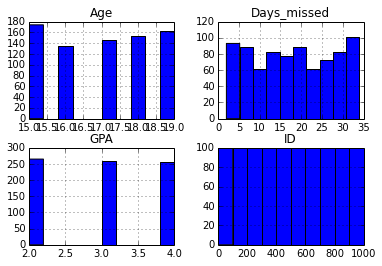

In [10]:
df.hist()

We can see that GPA is either 2.0, 3.0, or 4.0

More visualizations for state and graduation

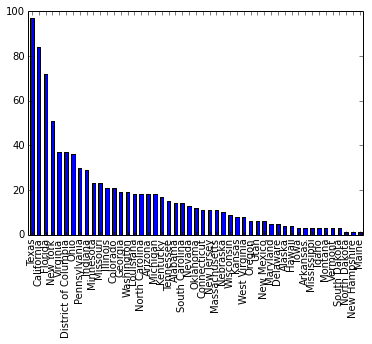

In [11]:
fig, ax = plt.subplots()
df['State'].value_counts().plot(ax=ax, kind='bar')

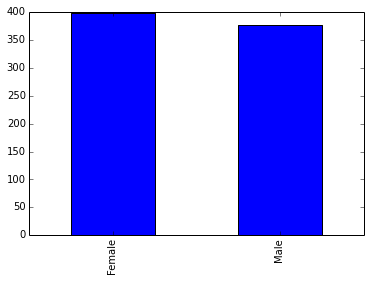

In [12]:
fig, ax = plt.subplots()
df['Gender'].value_counts().plot(ax=ax, kind='bar')

We could draw histograms for the remaining categorical data (first and last names) but that would be hard to interpret and not very useful for our purposes.

### A.2

Infer the gender of the student based on their name. Please use the API at www.genderize.io to infer the gender of each student and generate a new data file.

In [14]:
missing_name_df = df.loc[(df["Gender"].isnull()), "First_name"]
names = missing_name_df.values

url = 'https://api.genderize.io/?' + '&'.join('name=[%s]=%s' % pair for pair in enumerate(names))

r = requests.get(url)
try:
    r.raise_for_status()
except requests.exceptions.HTTPError as e:
    return "Error: " + str(e)





SyntaxError: 'return' outside function (<ipython-input-14-4af6c44f35e0>, line 10)

### A.3

Fill in the missing values for Age, GPA, and Days_missed using the following approaches:
* Fill in missing values with the mean of the values for that attribute
* Fill in missing values with a class-conditional mean (where the class is whether they graduated or not).
* Is there a better, more appropriate method for filling in the missing values? If yes, describe and implement it. 

You should create 2 new files with the missing values filled, one for each approach A, B, and C

In [24]:
df_mean = df.fillna(df.mean())

In [25]:
df_mean.to_csv('df_mean.csv')

In [26]:
df_mean.isnull().sum()

ID               0
First_name       0
Last_name        0
State          116
Gender         226
Age              0
GPA              0
Days_missed      0
Graduated        0
dtype: int64

We got rid of the missing values for numerical data, but not for state and gender. Note that since we're using the mean, GPA data (which was previously only 2, 3, or 4) will now have the mean of 2.988447.

In [27]:
df_condi_mean = df.copy

In [28]:
df_condi_mean = df.groupby("Graduated").transform(lambda x: x.fillna(x.mean()))

In [29]:
df_condi_mean.head()

,ID,Age,GPA,Days_missed
0,1,19.00000,3.505376,9.000000
1,2,18.00000,3.000000,16.775561
2,3,17.00000,3.505376,10.000000
3,4,15.00000,2.000000,28.000000
4,5,17.05178,2.000000,29.000000


In [30]:
!!!!! fix above

['/bin/sh: !!!: command not found']

#### Is there a better or more appropriate way to fill missing values? 

### Problem B

Let's look at Adam, Bob, Chris and David. Bob and David share identical characteristics (with each other, not necessarily Adam and Chris), except for their incomes, and Adam and Chris share the same characteristics except for income. 

Based on the results coefficients, we see that a unit increase in log family income decreases the odds ratio of graduating. Given that Bob and David share identical characteristics, the model indicates that David has a higher (possibly small) probability of graduating since his income is 10,000 dollars less. Likewise,  Chris's family income is also 10,000 dollars less, so his probability of graduating is greater than Adam's 50% probability. 
The question of whether Chris has a higher probability of graduating than David, or vice versa, depends on if a 10,000 dollars change at the 200,000 dollars income is larger or greater than the effect of a 10,000 dollars change at the 50,000 income level. That is, if I am making 200,000, does decreasing my income increase my odds of graduating more than if I earn 50,000 dollars and decrease my income to 40,000 dollars? This could be calculated mathematically by using the logistic pdf, but at this point, we cannot certainly determine if Chris' probability of graduating is greater than David's - only that they both most likely have a probability of graduating that is greater than 50%.

We can interpret logistic regression coefficients as the change in the log odds of the outcome for a one unit increase in the covariate. I can interpret the coefficients for the logistic regression model that predicts student graduation as follows:
* The negative coefficient on AfAM_Male means that being an African American male decreases the odds ratio of graduating. 
* The difference between AFAm_Male and AfAm is female. That is, If a person is African American but not male, that person is a female. 
**** Af M v. f
* If a male is not African American, then his probability of graduating is represented by the coefficient for Male, indicating that being male, unlike being an African American male, makes a person more likely to graduate.
* The coefficient for age indicates that a unit increase in age decreases the probability of graduation by 0.013, while the age squared coefficient indicates that an increase in squared age increases the probability of graduating by 0.0001. Notice that the z scores for both are small, meaning that they are not very statistically significant. Intuitively, a student who is younger, say 12, is of course less likely to graduate than a student who is 17, but the coefficients do not model that very well. 
* As a general rule, we look at the z score to decide if to drop a variable because of low statistical significance. I would remove both age variables based on the unintuitive and low-significance results.
